In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Python/dacon/raw/oil

Mounted at /content/drive
/content/drive/MyDrive/Python/dacon/raw/oil


In [ ]:
from datetime import datetime
import time
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
import os

def log(message):
    print(f"[{datetime.now().strftime('%Y/%m/%d %H:%M:%S')}] {message}")

def get_oil_price(code):
    delay = 0.01
    page = 1
    result = []

    with requests.Session() as session:
        log(f"데이터 수집을 시작합니다. (code: {code})")
        while True:
            url = 'https://finance.naver.com/marketindex/worldDailyQuote.nhn?marketindexCd={}&fdtc=2&page={}'.format(code, page)
            try:
                data = pd.read_html(session.get(url).text)[0].dropna()
                if page != 1 and data.iloc[-1, 0] == result[-1].iloc[-1, 0]:
                    break
                result.append(data)
                page += 1
                time.sleep(delay)
            except Exception as e:
                log(f"데이터 수집 중 에러 발생: {e}")
                break

    oil_price = pd.concat(result, ignore_index=True)
    oil_price.columns = ['날짜', code, '전일대비', '등락율']
    oil_price = oil_price[['날짜',code]]
    oil_price['날짜'] = pd.to_datetime(oil_price['날짜'], format='%Y.%m.%d')

    log(f"데이터 수집을 종료합니다. (code: {code}, 데이터수: {len(oil_price):,}개)")
    return oil_price

def save_oil_price(code):
    oil_price = get_oil_price(code)
    oil_price.to_csv(f"{datetime.now().date()}{code}.csv", index=False)

# code_list = ["OIL_CL", "OIL_BRT", "OIL_DU"]
# with ThreadPoolExecutor(max_workers=len(code_list)) as executor:
#     executor.map(save_oil_price, code_list)

In [ ]:
import os

# 대상 디렉토리 경로를 지정합니다.
directory = '/content/drive/MyDrive/Python/dacon/raw/oil'

# 디렉토리 내의 모든 CSV 파일을 DataFrame으로 읽어서 리스트에 저장합니다.
dfs = [pd.read_csv(os.path.join(directory, file), index_col=0) for file in os.listdir(directory) if file.endswith('.csv')]

# 첫 번째 DataFrame을 기준으로 나머지를 병합합니다.
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='날짜', how='inner')
merged_df = merged_df.reset_index()

merged_df['날짜'] = pd.to_datetime(merged_df['날짜']).map(lambda x: x.date())
merged_df['날짜']

0       2023-10-17
1       2023-10-16
2       2023-10-13
3       2023-10-12
4       2023-10-11
           ...    
4090    2007-04-13
4091    2007-04-12
4092    2007-04-11
4093    2007-04-10
4094    2007-04-05
Name: 날짜, Length: 4095, dtype: object

In [ ]:
import numpy as np

In [ ]:
# '-'을 NaN으로 대체
final_df.replace('-', np.nan, inplace=True)
final_df.isna().sum()

날짜                 0
BDI             1388
KCCI            4630
SCFI            4630
SCFI(USWC)      2188
SCFI(Europe)    2188
SCFI(USEC)      4630
HRCI            1973
WS              1940
HSFO            4628
VLSFO           4629
날짜_ord             0
dtype: int64

In [ ]:
# '-'을 NaN으로 대체
final_df.isna().sum()

날짜                 0
BDI             1383
KCCI            4629
SCFI            4629
SCFI(USWC)      1791
SCFI(Europe)    1792
SCFI(USEC)      4630
HRCI            1567
WS              1544
HSFO            4627
VLSFO           4628
날짜_ord             0
dtype: int64

In [ ]:
ship_idx = pd.read_excel("/content/drive/MyDrive/Python/dacon/raw/oil/shipping_index_2023-10-22.xlsx")
ship_idx['날짜'] = pd.to_datetime(ship_idx['날짜']).map(lambda x: x.date())
ship_idx

,날짜,BDI,KCCI,SCFI,SCFI(USWC),SCFI(Europe),SCFI(USEC),HRCI,WS,HSFO,VLSFO
0,2023-10-16,1972,1157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-13,1945,NaN,892,1735,562,2230,NaN,55,512,684
2,2023-10-12,1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-11,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-10,1983,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3284,2011-01-11,1480,NaN,NaN,NaN,NaN,NaN,694.6,50,NaN,NaN
3285,2011-01-10,1495,NaN,NaN,NaN,NaN,NaN,694.6,50,NaN,NaN
3286,2011-01-07,1519,NaN,NaN,NaN,NaN,NaN,694.6,50,NaN,NaN
3287,2011-01-06,1544,NaN,NaN,NaN,NaN,NaN,694.6,62.5,NaN,NaN


In [ ]:
type(ship_idx['BDI'][0])

int

In [ ]:
# 전체 날짜 시퀀스 생성
all_dates = pd.date_range(start=merged_df['날짜'].min(), end=merged_df['날짜'].max())

# 전체 날짜를 사용하여 새로운 데이터프레임 생성
full_df = pd.DataFrame(all_dates, columns=['날짜'])
full_df['날짜'] = pd.to_datetime(full_df['날짜']).map(lambda x: x.date())

# 원래 데이터프레임과 병합
final_df = pd.merge(full_df, merged_df, on='날짜', how='left')

for i in final_df.columns[1:]:
  final_df[i].interpolate(method='spline', order=2, inplace=True)

In [ ]:
# 전체 날짜 시퀀스 생성
all_dates = pd.date_range(start=ship_idx['날짜'].min(), end=ship_idx['날짜'].max())

# 전체 날짜를 사용하여 새로운 데이터프레임 생성
full_df = pd.DataFrame(all_dates, columns=['날짜'])
full_df['날짜'] = pd.to_datetime(full_df['날짜']).map(lambda x: x.date())

# 원래 데이터프레임과 병합
final_df = pd.merge(full_df, ship_idx, on='날짜', how='left')
final_df.replace('-', np.nan, inplace=True)

for i in final_df.columns[1:]:
  final_df[i].interpolate(method='spline', order=2, inplace=True)

In [ ]:
final_df['diff'] = final_df['VLSFO'] - final_df['HSFO']

In [ ]:
final_df[['날짜','BDI', 'WS']].to_csv("ship_idx_data.csv")

In [ ]:
# 결측치가 없는 데이터만으로 보간 함수를 생성
x = df['x'][df['y'].notna()]
y = df['y'][df['y'].notna()]
f = interp1d(x, y, kind='cubic')

# 결측치가 있는 인덱스를 찾고 보간 함수로 y 값을 계산
missing_indices = df.index[df['y'].isna()].tolist()
df.loc[missing_indices, 'y'] = f(df['x'][missing_indices])

# 결과 출력
print(df)

# 그래프로 결과 시각화
plt.plot(df['x'], df['y'], 'o-', label='Interpolated Data')
plt.plot(x, y, 's', label='Original Data')
plt.legend()
plt.show()

In [ ]:
final_df['BDI']

0       1621
1       1544
2       1519
3        NaN
4        NaN
        ... 
4664    1935
4665    1945
4666     NaN
4667     NaN
4668    1972
Name: BDI, Length: 4669, dtype: object

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

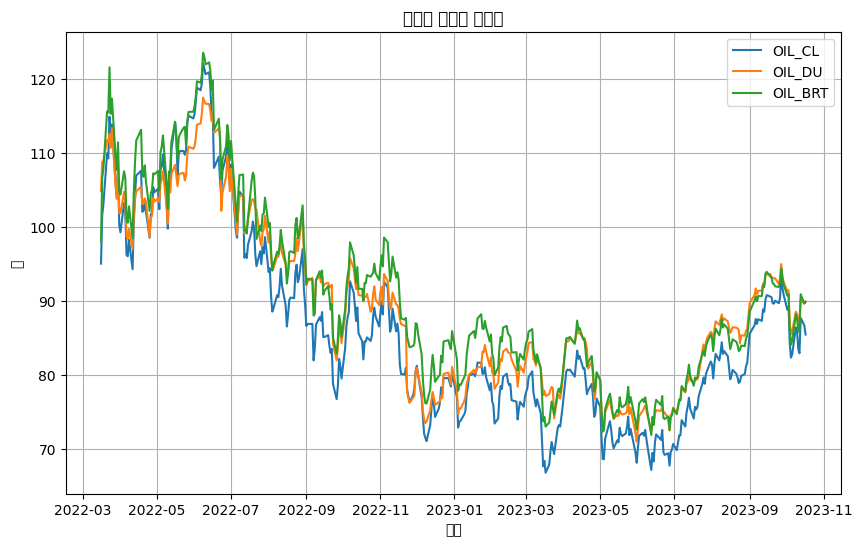

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 보간된 데이터를 라인 플롯으로 시각화
plt.figure(figsize=(10, 6))
for column in merged_df.columns[1:]:
    plt.plot(merged_df['날짜'][:400], merged_df[column][:400], label=column)

plt.title('보간된 데이터 시각화')
plt.xlabel('날짜')
plt.ylabel('값')
plt.grid(True)
plt.legend()
plt.show()

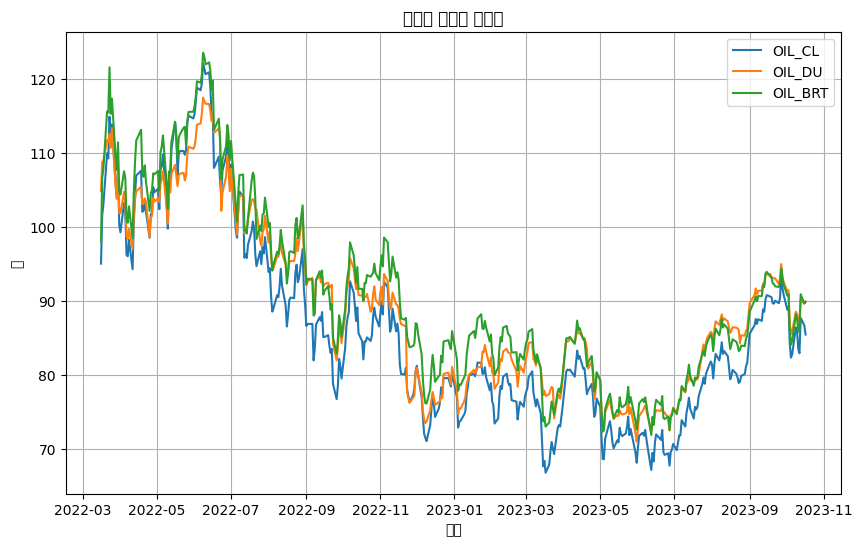

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 보간된 데이터를 라인 플롯으로 시각화
plt.figure(figsize=(10, 6))
for column in merged_df.columns[1:]:
    plt.plot(merged_df['날짜'][:400], merged_df[column][:400], label=column)

plt.title('보간된 데이터 시각화')
plt.xlabel('날짜')
plt.ylabel('값')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
final_df.to_csv("oil_data.csv")

In [ ]:
with requests.Session() as session:
  tmp = pd.read_html(session.get('https://kr.investing.com/indices/baltic-dry-historical-data').text)

In [ ]:
tmp

[              날짜      종가      시가      고가      저가  거래량    변동 %
 0   2023- 10- 20  2046.0  2046.0  2046.0  2046.0  NaN  -1.21%
 1   2023- 10- 19  2071.0  2071.0  2071.0  2071.0  NaN  -1.62%
 2   2023- 10- 18  2105.0  2105.0  2105.0  2105.0  NaN  +2.28%
 3   2023- 10- 17  2058.0  2058.0  2058.0  2058.0  NaN  +4.36%
 4   2023- 10- 16  1972.0  1972.0  1972.0  1972.0  NaN  +1.39%
 5   2023- 10- 13  1945.0  1945.0  1945.0  1945.0  NaN  +0.52%
 6   2023- 10- 12  1935.0  1935.0  1935.0  1935.0  NaN  -0.67%
 7   2023- 10- 11  1948.0  1948.0  1948.0  1948.0  NaN  -1.77%
 8   2023- 10- 10  1983.0  1983.0  1983.0  1983.0  NaN  -0.40%
 9   2023- 10- 09  1991.0  1991.0  1991.0  1991.0  NaN  +3.21%
 10  2023- 10- 06  1929.0  1929.0  1929.0  1929.0  NaN  +5.58%
 11  2023- 10- 05  1827.0  1827.0  1827.0  1827.0  NaN  +2.76%
 12  2023- 10- 04  1778.0  1778.0  1778.0  1778.0  NaN  -0.11%
 13  2023- 10- 03  1780.0  1780.0  1780.0  1780.0  NaN  +2.48%
 14  2023- 10- 02  1737.0  1737.0  1737.0  1737.0  NaN 